<a href="https://colab.research.google.com/github/cameronabel/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Cameron_Abel_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def my_stats(lst):
  lst_mean = sum(lst) / len(lst)
  lst_var = sum(list(map(lambda x: (x-lst_mean) ** 2, lst))) / (len(lst) - 1)
  lst_std = lst_var ** 0.5
  return lst_mean, lst_var, lst_std

In [37]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
sales_stats = my_stats(sales)
print(f'The sample mean is {sales_stats[0]:,.2f}')
print(f'The sample variance is {sales_stats[1]:,.2f}')
print(f'The sample standard deviation is {sales_stats[2]:,.2f}')

The sample mean is 3,052.71
The sample variance is 214,387.90
The sample standard deviation is 463.02


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
def my_cov(x, y):
  m_x = sum(x) / len(x)
  m_y = sum(y) / len(y)
  cov = sum([(i - m_x) * (j - m_y) for i, j in zip(x, y)]) / (len(x) - 1)
  return cov

In [0]:
cust = [127, 80, 105, 92, 120, 115, 93]
sales_cust_cov = my_cov(sales, cust)

In [40]:
print(f'The covariance between the samples is {sales_cust_cov:,.2f}')

The covariance between the samples is 7,604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
cust_stats = my_stats(cust)

In [0]:
def my_corr(x, y):
  x_m, _, x_s = my_stats(x)
  y_m, _, y_s = my_stats(y)
  z_x = [(i - x_m) / x_s for i in x]
  z_y = [(j - y_m) / y_s for j in y]
  r = sum([i * j for i, j in zip(z_x, z_y)]) / (len(x) - 1)
  return r

In [53]:
r = my_corr(sales, cust)
r

0.962833977814891

In [54]:
print(f'The correlation coefficient between the two samples is {r:,.4f}')

The correlation coefficient between the two samples is 0.9628


In [58]:
# Checking via pandas
df = pd.DataFrame({'sales': sales, 'cust': cust})
df.corr().iloc[0,1]

0.9628339778148908

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [59]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
tt = pd.read_csv(url)
tt.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [60]:
tt.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [61]:
tt.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
vec_1 = [2, 3]
vec_2 = [3, -2]

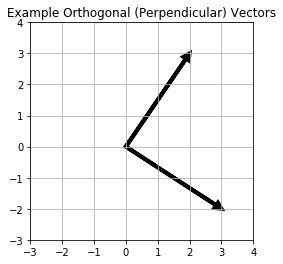

In [70]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid()
plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.title('Example Orthogonal (Perpendicular) Vectors')

for vector in [vec_1, vec_2]:
  plt.arrow(0, 0, *vector,
            head_width=.2,
            head_length=.2,
            linewidth=4,
            length_includes_head=True)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [72]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a, b)

-40

The above vectors are not orthogonal.  Orthogonal vectors have a dot product of zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

### What is $||c||^2$?

In [94]:
np.linalg.norm(c) ** 2

665.0

### What is $c \cdot c$? 

In [95]:
np.dot(c, c)

665

### What is $c^{T}c$?

In [98]:
np.dot(c.T, c)

665

All values are the same for the above calculations.

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}$
$ = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}$

$e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}$
$ = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])

In [102]:
f_hat = f / (f ** 2).sum() ** 0.5
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [103]:
np.linalg.norm(f_hat)

0.9999999999999999

The unit vector for f is approximately: $0.209\hat{i} + 0.627\hat{j} + 0.575\hat{k} + 0.105\hat{l}$

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

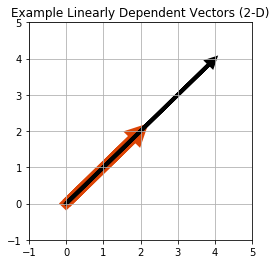

In [119]:
vec_1 = [2, 2]
vec_2 = [4, 4]

fig, ax = plt.subplots(figsize=(4, 4))
ax.grid()
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Example Linearly Dependent Vectors (2-D)')

for vector, color, width in zip([vec_1, vec_2], ['#DC4405', 'k'], (10, 4)):
  plt.arrow(0, 0, *vector,
            head_width=.2,
            head_length=.2,
            linewidth=width,
            length_includes_head=True,
            color = color)

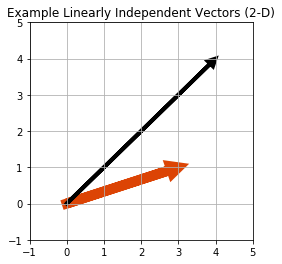

In [162]:
vec_1 = [3, 1]
vec_2 = [4, 4]

fig, ax = plt.subplots(figsize=(4, 4))
ax.grid()
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Example Linearly Independent Vectors (2-D)')

for vector, color, width in zip([vec_1, vec_2], ['#DC4405', 'k'], (10, 4)):
  plt.arrow(0, 0, *vector,
            head_width=.2,
            head_length=.2,
            linewidth=width,
            length_includes_head=True,
            color = color)

In [0]:
vec_3 = [2, 2, 2]
scalars = [(3, '#DC4405', 8), (5, 'k', 3)]

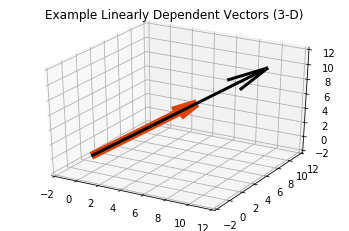

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2, 12)
ax.set_ylim(-2, 12)
ax.set_zlim(-2, 12)
plt.title('Example Linearly Dependent Vectors (3-D)')
for scalar, color, width in scalars:
  ax.quiver(0, 0, 0,
            *np.array(vec3)*scalar,
            color=color,
            linewidth=width,
            arrow_length_ratio=.2)

In [0]:
vecs = ([2, 2, 2], [1, 3, 5])
colors = ['#DC4405', 'k']

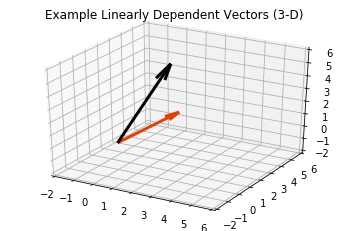

In [171]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)
ax.set_zlim(-2, 6)
plt.title('Example Linearly Dependent Vectors (3-D)')
for vec, color in zip(vecs, colors):
  ax.quiver(0, 0, 0,
            *vec,
            color=color,
            linewidth=width,
            arrow_length_ratio=.2)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [175]:
g = np.array([1, 2])
h = np.array([4, 8])

np.array_equal(4 * g, h)

True

Because g is a subset of h, the span of the vectors is linear and occupies the space $a\hat{i} + 2a\hat{j}$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [197]:
l = np.array([1, 2, 3])
m = np.array([-1, 0, 7])
n = np.array([4, 8, 2])

p = np.array([l, m, n])
p

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

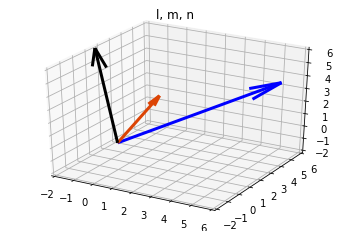

In [178]:
colors = ['#DC4405', 'k', 'blue']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)
ax.set_zlim(-2, 6)
plt.title('l, m, n')
for vec, color in zip(p, colors):
  ax.quiver(0, 0, 0,
            *vec,
            color=color,
            linewidth=width,
            arrow_length_ratio=.2)

By Gaussian elimination:

In [198]:
p = np.array([p[0], p[1] * 4 + p[2], p[2]])
p

array([[ 1,  2,  3],
       [ 0,  8, 30],
       [ 4,  8,  2]])

In [199]:
p = np.array([p[0], p[1] / 8, p[2]])
p

array([[1.  , 2.  , 3.  ],
       [0.  , 1.  , 3.75],
       [4.  , 8.  , 2.  ]])

In [200]:
p = np.array([p[0], p[1], p[2] - 4 * p[0]])
p

array([[  1.  ,   2.  ,   3.  ],
       [  0.  ,   1.  ,   3.75],
       [  0.  ,   0.  , -10.  ]])

In [201]:
p = np.array([p[0], p[1], p[2] * -0.1])
p

array([[ 1.  ,  2.  ,  3.  ],
       [ 0.  ,  1.  ,  3.75],
       [-0.  , -0.  ,  1.  ]])

In [203]:
p = np.array([p[0] - 2 * p[1], p[1], p[2]])
p

array([[ 1.  ,  0.  , -4.5 ],
       [ 0.  ,  1.  ,  3.75],
       [-0.  , -0.  ,  1.  ]])

In [0]:
p = np.array([p[0] + 4.5 * p[2], p[1] - 3.75 * p[2], p[2]])

In [205]:
p

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [-0., -0.,  1.]])

Vectors l, m, n span all of 3-D space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



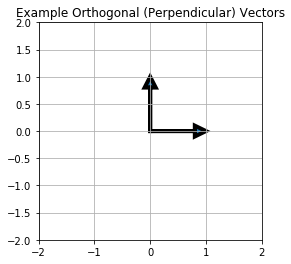

In [208]:
vec_1 = [1, 0]
vec_2 = [0, 1]

fig, ax = plt.subplots(figsize=(4, 4))
ax.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Example Orthogonal (Perpendicular) Vectors')

for vector in [vec_1, vec_2]:
  plt.arrow(0, 0, *vector,
            head_width=.2,
            head_length=.2,
            linewidth=4,
            length_includes_head=True)

## 6.2 What does it mean to form a basis?

The vectors are independent and span the entire space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

Please see above for the Gaussian elimination for this set of vectors.  The Rank of P is 3.

## 7.2 What does the rank of a matrix tell us?

How many dimensions are spanned by the set of vectors in the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = [1, 3]

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

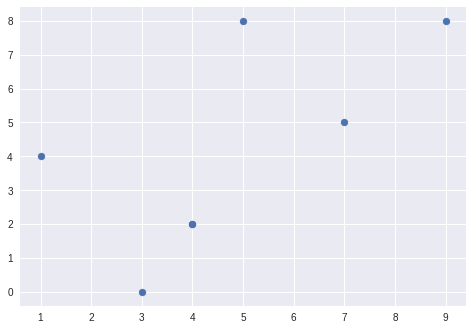

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()